# Importation des bibliothéque nécessaire pour le TP

## Description du TP : Segmentation des Clients avec K-means
### Contexte :

   Dans le cadre de ce TP, nous allons réaliser une segmentation client à l'aide de l'algorithme des K-means. L'objectif est de regrouper les clients en clusters homogènes en fonction de leurs caractéristiques ( revenu annuel, dépenses), afin d'identifier des profils types et d'adapter des stratégies marketing ciblées.

### Objectifs :

    Prétraitement des données : Nettoyage et préparation du dataset pour l'analyse.

    Analyse exploratoire : Visualisation des données pour identifier des tendances.

  #####  Clustering avec K-means :

    Détermination du nombre optimal de clusters (méthode du coude).

    Application de l'algorithme K-means.

#### Interprétation des résultats.

    Visualisation des clusters : Représentation graphique des segments obtenus.

  #####  Dataset utilisé :
    Le fichier MCustomers.csv contient les données de 200 clients avec les colonnes suivantes :

     CustomerID : Identifiant unique du client.

    Genre : Sexe du client (Male/Female).

    Age : Âge du client.

    RevenuAnnuel-K$ : Revenu annuel en milliers de dollars.

    Depense_1-100 : Score de dépense (normalisé entre 1 et 100).

In [ ]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

# Importation du dataset

In [ ]:
customer = pd.read_csv("MCustomers.csv", sep=",", encoding="utf-8")

In [ ]:
print("Dimensions initiales :", customer.shape)


Dimensions initiales : (200, 5)


### affichage des 5 premiers elements du dataset

In [ ]:
customer.head()

,CustomerID,Genre,Age,RevenuAnnuel-K$,Depense_1-100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       200 non-null    int64 
 1   Genre            200 non-null    object
 2   Age              200 non-null    int64 
 3   RevenuAnnuel-K$  200 non-null    int64 
 4   Depense_1-100    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##### supression de la colonne des identifiants car elle ne nous servira pas dans l'analyse des données


In [ ]:
customer = customer.drop('CustomerID', axis = 1)

In [ ]:
customer.head()

,Genre,Age,RevenuAnnuel-K$,Depense_1-100
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


##### calcul de la moyenne, max,min et les quartilles

In [ ]:
customer.describe()

,Age,RevenuAnnuel-K$,Depense_1-100
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
customer = customer.drop('Genre', axis = 1) ## suppression de lq colonne Genre

In [ ]:
customer.corr()  ### calcul de la matrice de correlation

,Age,RevenuAnnuel-K$,Depense_1-100
Age,1.000000,-0.012398,-0.327227
RevenuAnnuel-K$,-0.012398,1.000000,0.009903
Depense_1-100,-0.327227,0.009903,1.000000


###### représentation visuelle des données sous forme de matrice colorée, où chaque valeur est représentée par une couleur différente.

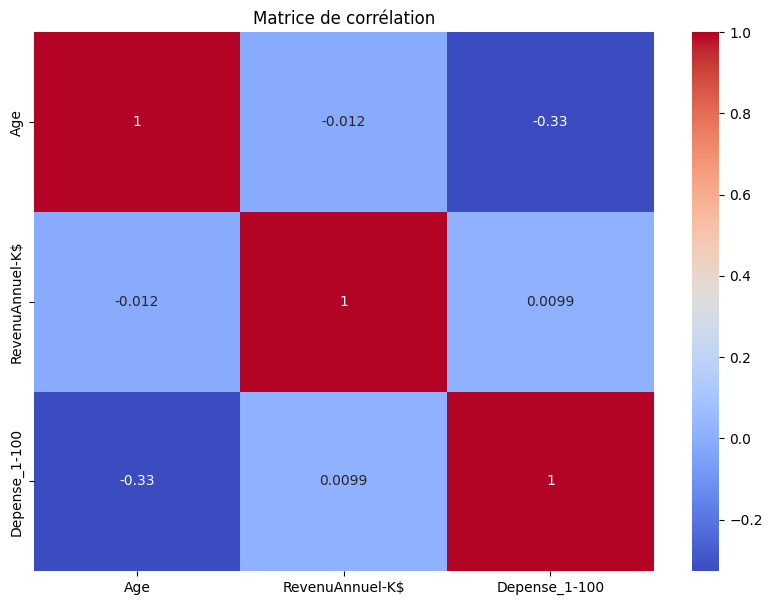

In [ ]:

plt.figure(figsize=(10, 7))  # Optionnel : pour agrandir le graphique
sns.heatmap(customer.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')  # Titre du graphique
plt.show()


### Préparation des données pour l'analyse : isolation des colonnes pertinentes (revenu et les dépenses) pour une analyse ciblée ( clustering avec KMEANS).

In [ ]:
data = customer[["RevenuAnnuel-K$", "Depense_1-100"]].copy()


In [ ]:
print(data.head())


   RevenuAnnuel-K$  Depense_1-100
0               15             39
1               15             81
2               16              6
3               16             77
4               17             40


In [ ]:
print("Nombre d'échantillons :", len(data))

Nombre d'échantillons : 200


In [ ]:
data = customer.drop(columns=['Age', 'Genre'], errors='ignore')

In [ ]:
data

,RevenuAnnuel-K$,Depense_1-100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


####  nuage de points (scatter plot) pour visualiser la relation entre le revenu annuel et les dépenses des clients du DataFrame data

Text(0, 0.5, 'Dépense (1-100)')

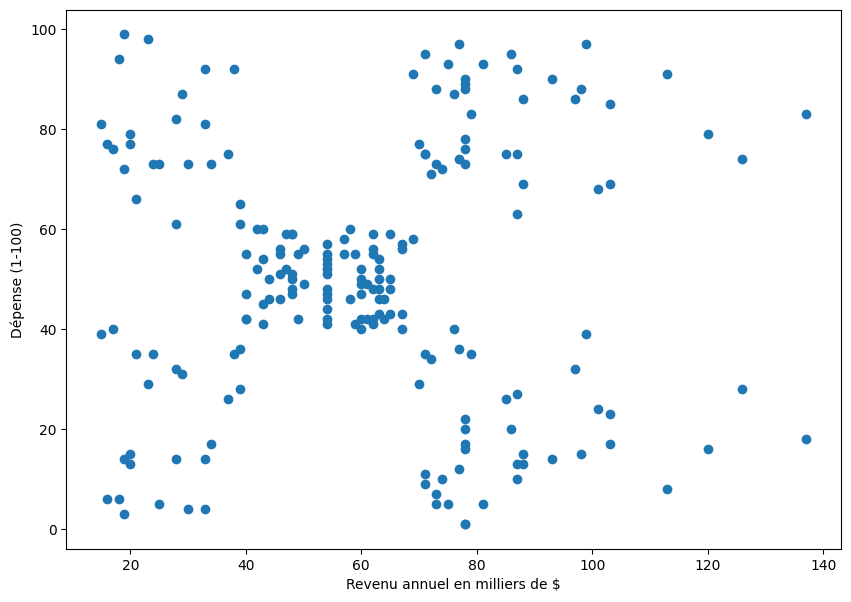

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(x = 'RevenuAnnuel-K$', y ='Depense_1-100', data = data )
plt.xlabel("Revenu annuel en milliers de $")
plt.ylabel('Dépense (1-100)')

# Application de l'algorithme du KMeans

In [ ]:
model = KMeans(n_clusters = 3 ) ## choix du nombre de cluster

In [ ]:
model.fit(data)

KMeans(n_clusters=3)

In [ ]:
centroides = model.cluster_centers_ ## choix aléatoire d'un nombre de centroides équivalent au nombre de clusters

In [ ]:
centroides

array([[87.        , 18.63157895],
       [44.15447154, 49.82926829],
       [86.53846154, 82.12820513]])

In [ ]:
labelsCentroides = model.labels_

In [ ]:
labelsCentroides

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
data['labelsCentroides'] = labelsCentroides

In [ ]:
data

,RevenuAnnuel-K$,Depense_1-100,labelsCentroides
0,15,39,1
1,15,81,1
2,16,6,1
3,16,77,1
4,17,40,1
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


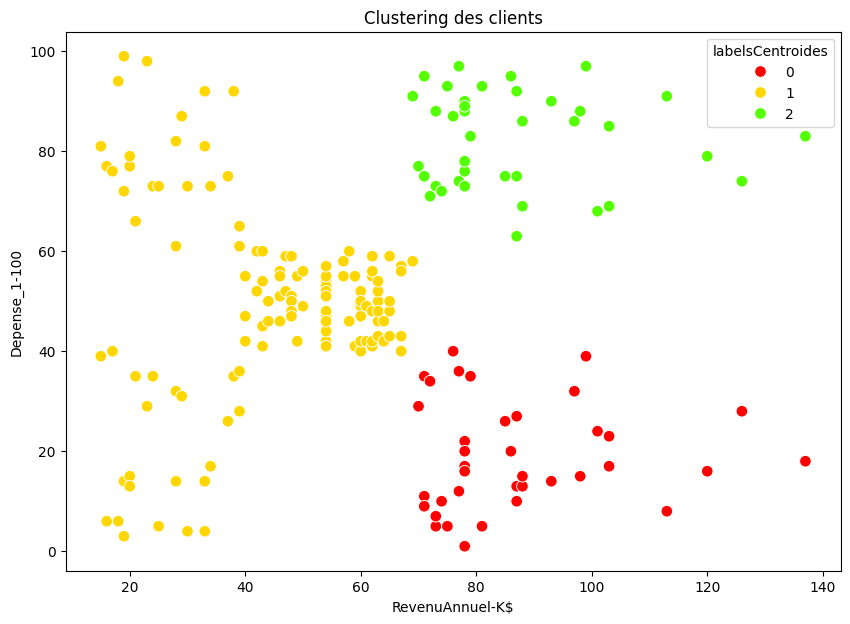

In [ ]:


plt.figure(figsize=(10, 7))
sns.scatterplot(x='RevenuAnnuel-K$', y='Depense_1-100', hue='labelsCentroides',
                data=data, palette='prism', s=70)
plt.title('Clustering des clients')  # Optionnel
plt.show()

In [ ]:
data['labelsCentroides'].value_counts() ## nombre d'observation pour chaque clusters

,count
labelsCentroides,
1,123
2,39
0,38


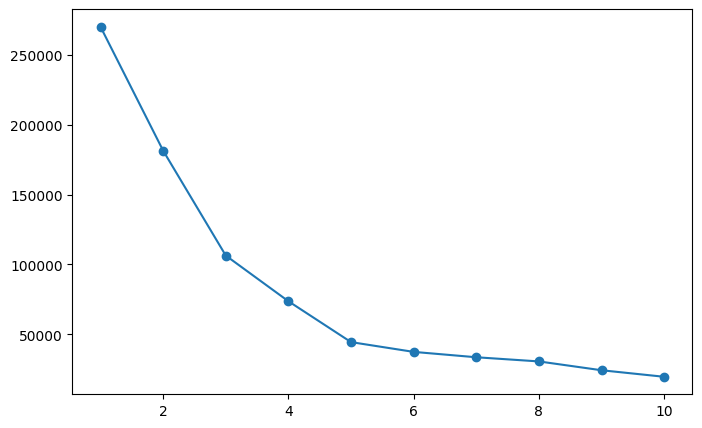

In [ ]:
tab = []
for k in range(1,11):
    model = KMeans(n_clusters = k)
    model.fit(data.drop('labelsCentroides', axis = 1))
    tab.append(model.inertia_)

plt.figure(figsize = (8,5))
plt.plot(range(1,11), tab)
plt.scatter(range(1,11), tab)

### ajoutons la colonne age et appliquons le kmeans de nouveau

In [ ]:
df = customer[['Age', 'RevenuAnnuel-K$', 'Depense_1-100']]

In [ ]:
df

,Age,RevenuAnnuel-K$,Depense_1-100
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
model1 = KMeans(n_clusters = 5)

In [ ]:
model1.fit(df)

KMeans(n_clusters=5)

In [ ]:
model1.cluster_centers_

array([[33.35185185, 57.7037037 , 49.        ],
       [41.64705882, 88.73529412, 16.76470588],
       [54.06      , 40.46      , 36.72      ],
       [32.69230769, 86.53846154, 82.12820513],
       [25.        , 25.26086957, 77.60869565]])

In [ ]:
labels = model1.labels_

In [ ]:
labels

array([4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [ ]:
df['Labels'] = labels

In [ ]:
df

,Age,RevenuAnnuel-K$,Depense_1-100,Labels
0,19,15,39,4
1,21,15,81,4
2,20,16,6,2
3,23,16,77,4
4,31,17,40,2
...,...,...,...,...
195,35,120,79,3
196,45,126,28,1
197,32,126,74,3
198,32,137,18,1


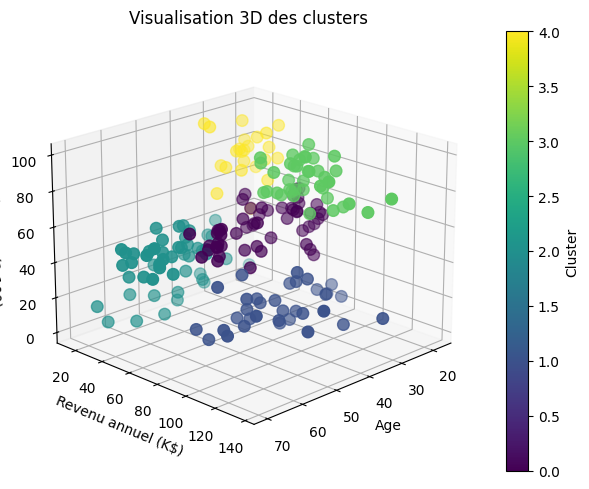

In [ ]:

from google.colab import output
output.enable_custom_widget_manager()  # Active l'affichage interactif

# Création du graphique 3D
plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')

# Scatter plot 3D
scatter = ax.scatter3D(df['Age'],
                      df['RevenuAnnuel-K$'],
                      df['Depense_1-100'],
                      c=labels,
                      s=70,
                      cmap='viridis')

# Labels des axes
ax.set_xlabel('Age')
ax.set_ylabel('Revenu annuel (K$)')
ax.set_zlabel('Dépenses (1-100)')
ax.set_title('Visualisation 3D des clusters')

# Ajout d'une barre de couleur
plt.colorbar(scatter, label='Cluster')

# Ajustement de l'angle de vue
ax.view_init(elev=20, azim=45)  # élévation à 20°, azimut à 45°

plt.tight_layout()
plt.show()